In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.metrics import classification_report
sns.set()
#Kitabxanaları əlavə edirik.

In [56]:
data = pd.read_csv('/kaggle/input/smoke-detection-dataset/smoke_detection_iot.csv')
data


,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [57]:
data.describe(include='all')

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [58]:
counts = data['Fire Alarm'].value_counts()
print(counts)
#Balanslılığını yoxlayırıq

1    44757
0    17873
Name: Fire Alarm, dtype: int64


In [59]:
data.isnull().sum()
#NA yoxdur

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [61]:
print(data.columns)



Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')


In [62]:
df_corr = data.corr()
df = pd.DataFrame(df_corr['Fire Alarm'])
df
#Korrelasiyası 0.10-dan yuxarıları seçirik

,Fire Alarm
Unnamed: 0,-0.361351
UTC,-0.389404
Temperature[C],-0.163902
Humidity[%],0.399846
TVOC[ppb],-0.214743
eCO2[ppm],-0.097006
Raw H2,0.107007
Raw Ethanol,-0.340652
Pressure[hPa],0.249797
PM1.0,-0.110552


In [64]:
data = data[['UTC','Humidity[%]', 'TVOC[ppb]','Raw Ethanol','Pressure[hPa]','CNT','Temperature[C]','Raw H2','PM1.0','NC0.5','Fire Alarm']]

In [65]:
variables = data[['UTC','Humidity[%]', 'TVOC[ppb]','Raw Ethanol','Pressure[hPa]','CNT','Temperature[C]','Raw H2','PM1.0','NC0.5']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

#Müstəqil verilənlərin arasında asılılığı yoxlayıb yüksək olanları silirik.

,VIF,Features
0,1.391839e+06,UTC
1,3.188786e+00,Humidity[%]
2,4.762731e+00,TVOC[ppb]
3,6.773630e+00,Raw Ethanol
4,2.842872e+00,Pressure[hPa]
5,2.834770e+00,CNT
6,1.110539e+00,Temperature[C]
7,2.823635e+00,Raw H2
8,9.090871e+00,PM1.0
9,1.051578e+01,NC0.5


In [66]:
variables = data[['UTC','Humidity[%]', 'TVOC[ppb]','Raw Ethanol','Pressure[hPa]','CNT','Temperature[C]','Raw H2','NC0.5']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,1.343449e+06,UTC
1,3.125679e+00,Humidity[%]
2,4.746239e+00,TVOC[ppb]
3,6.707819e+00,Raw Ethanol
4,2.743395e+00,Pressure[hPa]
5,2.814259e+00,CNT
6,1.110538e+00,Temperature[C]
7,2.783162e+00,Raw H2
8,2.228503e+00,NC0.5


In [67]:
variables = data[['UTC','Humidity[%]', 'TVOC[ppb]','Pressure[hPa]','CNT','Temperature[C]','Raw H2','NC0.5']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,1.130988e+06,UTC
1,3.125250e+00,Humidity[%]
2,3.373870e+00,TVOC[ppb]
3,2.404728e+00,Pressure[hPa]
4,1.096957e+00,CNT
5,1.091844e+00,Temperature[C]
6,2.225029e+00,Raw H2
7,2.062427e+00,NC0.5


In [68]:
data = data.drop(data[['Raw Ethanol','PM1.0']],axis=1)

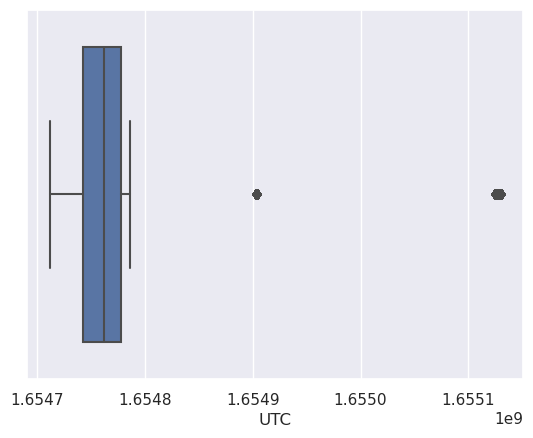

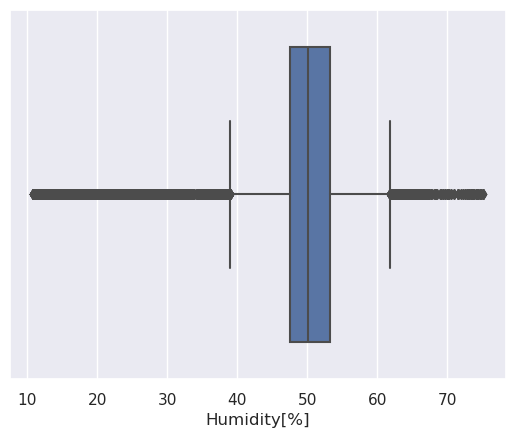

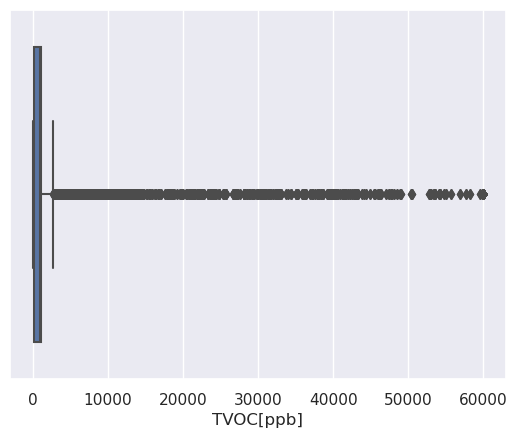

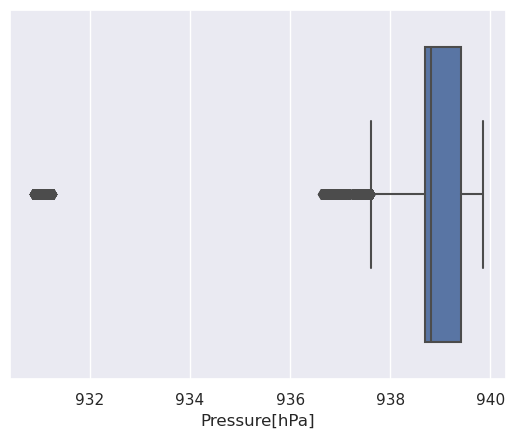

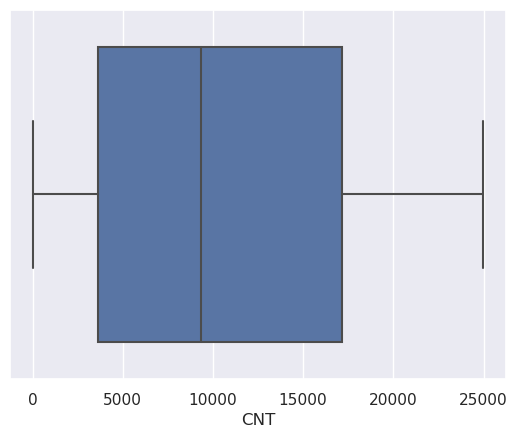

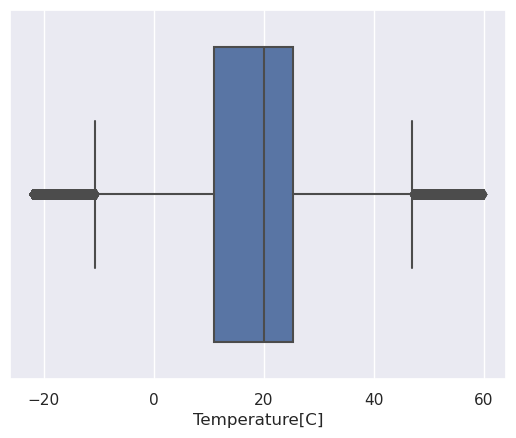

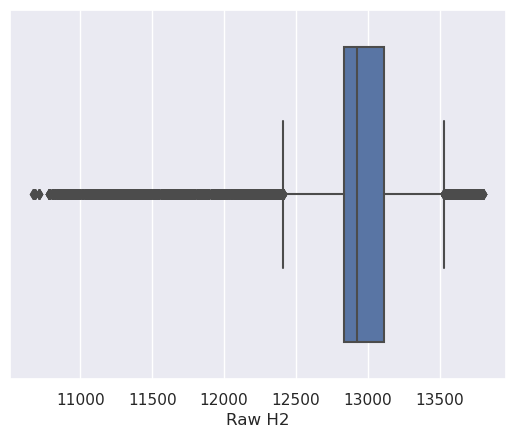

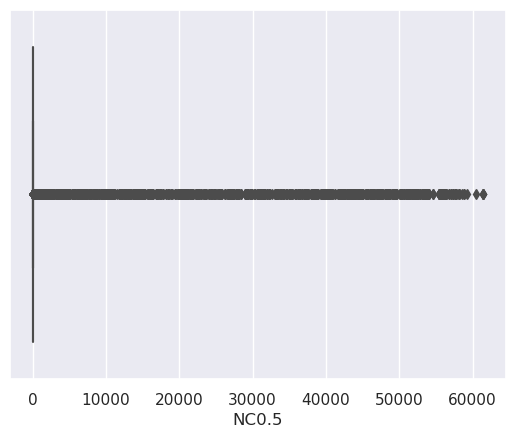

In [69]:
for i in data[['UTC','Humidity[%]', 'TVOC[ppb]','Pressure[hPa]','CNT','Temperature[C]','Raw H2','NC0.5']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()
#Sadə outlier treatment edirik.

In [70]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

In [71]:
for i in data[['UTC','Humidity[%]', 'TVOC[ppb]','Pressure[hPa]','CNT','Temperature[C]','Raw H2','NC0.5']]:
    data[i] = np.where(data[i] > Upper[i], Upper[i], data[i])
    data[i] = np.where(data[i] < Lower[i], Lower[i], data[i])


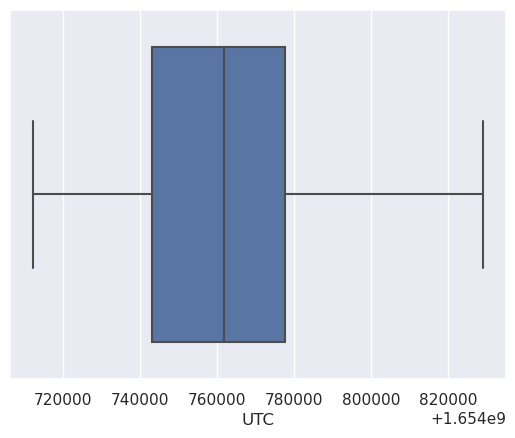

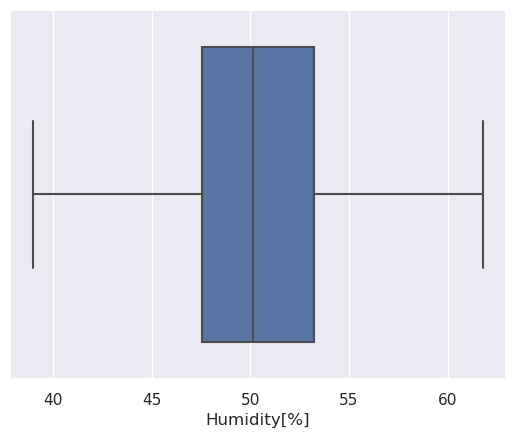

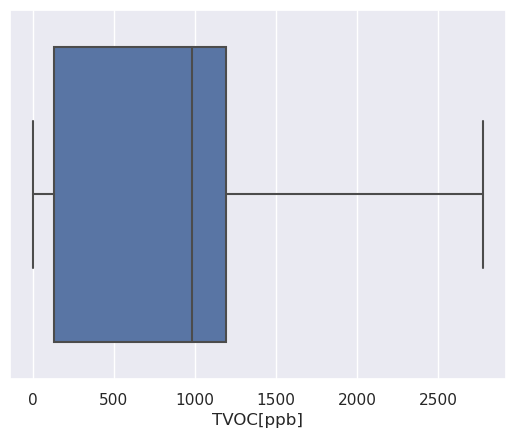

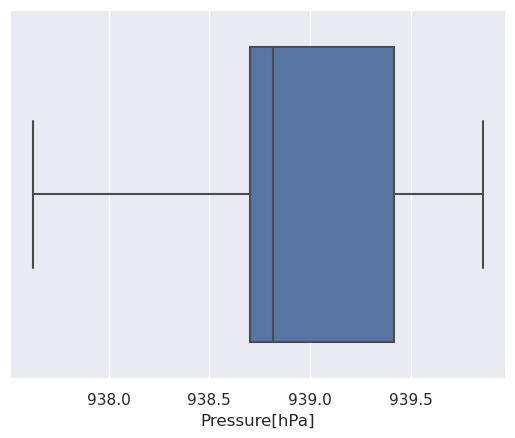

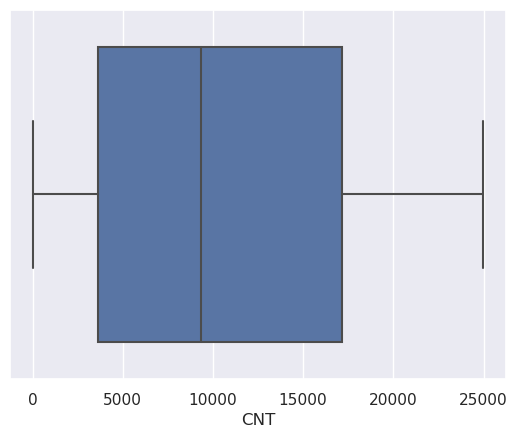

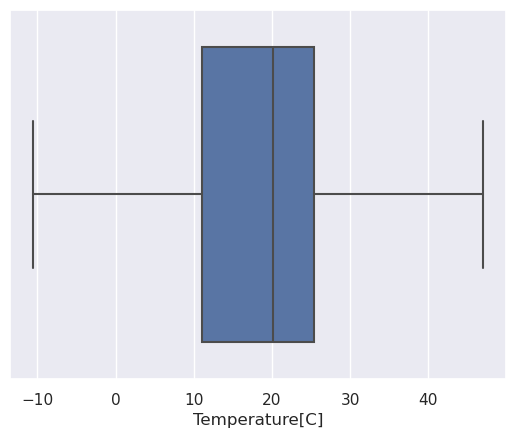

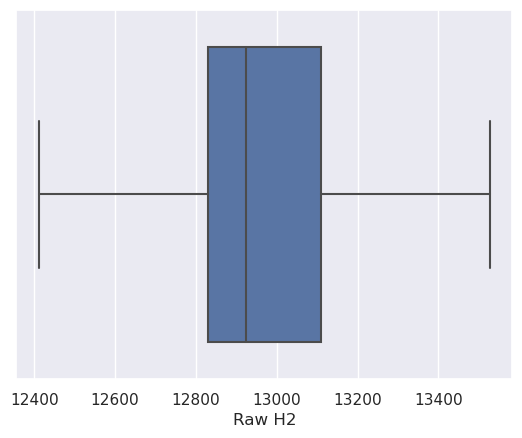

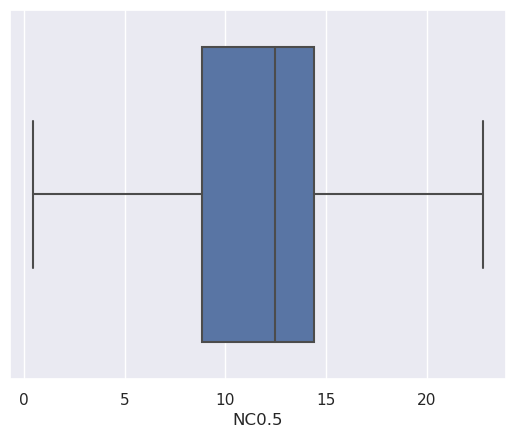

In [72]:
for i in data[['UTC','Humidity[%]', 'TVOC[ppb]','Pressure[hPa]','CNT','Temperature[C]','Raw H2','NC0.5']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [73]:
data 

,UTC,Humidity[%],TVOC[ppb],Pressure[hPa],CNT,Temperature[C],Raw H2,NC0.5,Fire Alarm
0,1.654733e+09,57.360,0.0,939.735,0.0,20.000,12411.5,0.42,0
1,1.654733e+09,56.670,0.0,939.744,1.0,20.015,12411.5,0.42,0
2,1.654733e+09,55.960,0.0,939.738,2.0,20.029,12411.5,0.42,0
3,1.654733e+09,55.280,0.0,939.736,3.0,20.044,12411.5,0.42,0
4,1.654733e+09,54.690,0.0,939.744,4.0,20.059,12411.5,0.42,0
...,...,...,...,...,...,...,...,...,...
62625,1.654829e+09,38.965,625.0,937.623,5739.0,18.438,13527.5,4.32,0
62626,1.654829e+09,38.965,612.0,937.623,5740.0,18.653,13527.5,4.18,0
62627,1.654829e+09,38.965,627.0,937.623,5741.0,18.867,13527.5,3.95,0
62628,1.654829e+09,38.965,638.0,937.623,5742.0,19.083,13527.5,3.92,0


In [75]:
from sklearn.preprocessing import StandardScaler

features = data.drop('Fire Alarm', axis=1).values

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_data = pd.DataFrame(data=scaled_features, columns=data.columns[:-1])
scaled_data['Fire Alarm'] = data['Fire Alarm']
data=scaled_data
#Yuxarıda gördüyünüz kimi verilən ədəd olaraq bir brindən çox fərqlənirlər, buna görə WOE-yə ehtiyyac var. Ondanda əvvəl scascalinglling edirik ki
#modelin stabilliyi və performansı artsın. Bunu niyə görə ilk edirik, çünki WOE-dən sonra etsək verilənlərin paylanmasını poza bilər.

In [76]:
numeric_vars = ['UTC','Humidity[%]', 'TVOC[ppb]','Pressure[hPa]','CNT','Temperature[C]','Raw H2','NC0.5']

for var in numeric_vars:
    ranges = [-np.inf, data[var].quantile(0.25), data[var].quantile(0.5), data[var].quantile(0.75), np.inf] 
    data['category'] = pd.cut(data[var], bins=ranges)
    
    grouped = data.groupby(['category', 'Fire Alarm'])['Fire Alarm'].count().unstack().reset_index()
    

    grouped['positive_prop'] = grouped[0] / grouped[0].sum()
    grouped['negative_prop'] = grouped[1] / grouped[1].sum()
    
    grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
    grouped.rename(columns={'woe':var+'_woe'}, inplace=True)
    data = data.merge(grouped[['category',var+'_woe']], how='left', on='category')
    data.drop('category', axis=1, inplace=True)
    data.drop(var, axis=1, inplace=True)
#WOE-ləri yaradırıq

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [77]:
data

,Fire Alarm,UTC_woe,Humidity[%]_woe,TVOC[ppb]_woe,Pressure[hPa]_woe,CNT_woe,Temperature[C]_woe,Raw H2_woe,NC0.5_woe
0,0,1.198489,-0.770489,1.778923,0.538202,2.827151,0.302687,1.105832,1.144434
1,0,1.198489,-0.770489,1.778923,0.538202,2.827151,0.302687,1.105832,1.144434
2,0,1.198489,-0.770489,1.778923,0.538202,2.827151,0.302687,1.105832,1.144434
3,0,1.198489,-0.770489,1.778923,0.538202,2.827151,0.302687,1.105832,1.144434
4,0,1.198489,-0.770489,1.778923,0.538202,2.827151,0.302687,1.105832,1.144434
...,...,...,...,...,...,...,...,...,...
62625,0,0.380679,1.666886,-0.229277,1.924556,-0.073965,0.302687,0.394016,1.144434
62626,0,0.380679,1.666886,-0.229277,1.924556,-0.073965,0.302687,0.394016,1.144434
62627,0,0.380679,1.666886,-0.229277,1.924556,-0.073965,0.302687,0.394016,1.144434
62628,0,0.380679,1.666886,-0.229277,1.924556,-0.073965,0.302687,0.394016,1.144434


In [78]:
data.isnull().sum()
#NA-olmamasına diqqət yetirmək lazımdır WOE-dən sonra

Fire Alarm            0
UTC_woe               0
Humidity[%]_woe       0
TVOC[ppb]_woe         0
Pressure[hPa]_woe     0
CNT_woe               0
Temperature[C]_woe    0
Raw H2_woe            0
NC0.5_woe             0
dtype: int64

In [79]:
y = data['Fire Alarm']
x = data.drop('Fire Alarm', axis = 1)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_pred = roc_auc_score(y_test, y_pred)
    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_pred = roc_pred*2-1
    gini_prob = roc_prob*2-1
    
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    precision = precision_score(y_test, y_pred)
    
    print('Model Performance')
    print('Gini pred is', gini_pred*100)
    print('Gini prob is', gini_prob*100)
    print('Accuracy is', accuracy*100)
    
    print('Confusion Matrix:', cm)
    
    print('Sensitivity is', sensitivity*100)
    print('Specificity is', specificity*100)
    print('Precision is', precision*100)
    
    return gini_pred, gini_prob, accuracy, cm, sensitivity, specificity, precision


In [83]:
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

train_means = X_train.mean()
X_train = X_train.fillna(train_means)
X_test = X_test.fillna(train_means)

#Modeli qurmazdan əvvəl woe və scaling nəticəsində float tipində olan məlumatlarımız çox kiçilməsi (sonsuzlağa qədər sıfıra yaxınlaşır)
#artıq istifadəsini(modeldə) çətinləşdirir.
#Buna görə inf-kimi   onları NA ilə əvəzləyirik.Sonra NA-ları mean-lə əvəz edirik(normal paylanan məlumatlarımız var deyə).
#Əlbəttə ancaq train data-mızın ortalamsını istifadə edirik, çünki data leakage-in qarşısını almalıyıq . Beləliklə 
#train-dəki məlumatları hər ikisndə  istifadə edərək test datasının məlumatlarının train data-sına təsadüfən sızmasının qarşısını almış oluruq.
#Bunu edərək tam əmin oluruq ki, model test set-dəki məlumatlarla tanış deyil.

In [84]:
base_model = svm.SVC(probability=True)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)
#Nəticələr çox idel olması optimizasiya vasitəsi ilə yenidən yoxlama aparmağın vacibliyinə sübut olur.

Model Performance
Gini pred is 99.25908723722938
Gini prob is 99.7762134744504
Accuracy is 99.5742189579009
Confusion Matrix: [[ 5422    13]
 [   67 13287]]
Sensitivity is 99.4982776696121
Specificity is 99.76080956761729
Precision is 99.90225563909775


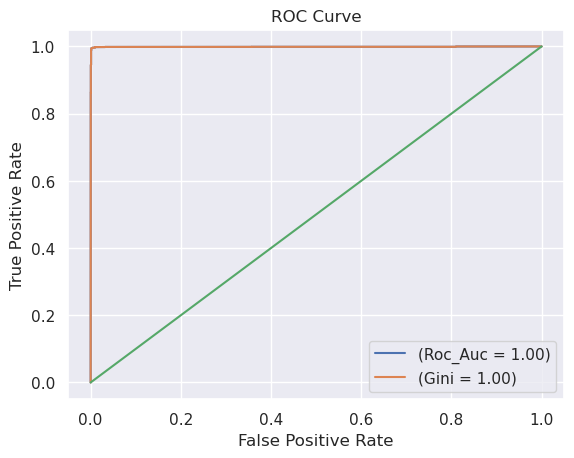

In [85]:
from sklearn.metrics import roc_curve

y_prob = base_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

In [86]:
from sklearn.model_selection import RandomizedSearchCV

kernel = ['poly', 'rbf', 'sigmoid']

gamma = ['scale', 'auto'] 


C = [1, 10, 100, 1e3, 1e4, 1e5, 1e6]

random_grid = {'kernel': kernel,
               'gamma': gamma,
               'C': C}
print(random_grid)

{'kernel': ['poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto'], 'C': [1, 10, 100, 1000.0, 10000.0, 100000.0, 1000000.0]}


In [90]:
svc_random = RandomizedSearchCV(estimator = base_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, n_jobs = -1)
svc_random.fit(X_train, y_train)
#Cross validasiyanın 3 olması və iterasiyaların yüksək olması ilə biz modelimizi həm optimizasiya, həm də yenidən yoxlamış oluruq.

Fitting 3 folds for each of 42 candidates, totalling 126 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 42 is smaller than n_iter=100. Running 42 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=3, estimator=SVC(probability=True), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [1, 10, 100, 1000.0, 10000.0,
                                              100000.0, 1000000.0],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['poly', 'rbf', 'sigmoid']},
                   verbose=1)

In [91]:
svc_random.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'C': 100000.0}

In [92]:
optimized_model = svc_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, X_test, y_test)
#Data-nın balanslılıq səviyyəsini görmüşdük. Startdart modelin overfitting nəticəsi olması ehtimalını sıfıra endirmək üçün
#optimizasiya alətlərindən istifadə edərək modelin çox yüksək küyfiyyətə malik olduğuna bir daha şahid oluruq.
#Gini  əmsalının base modeldə yüzə çox yaxın olsa da, optimizasiyadan sonra cuzi də olsa  bir azda artıb. Bu digər göstəricilərə də aiddir.
#Əlbəttə belə yüksək nəticə data-nın kaggle platformasından olması, model qurmaq üçün çox uyumlu olması  ilə bağlamaq olduqca doğru olardı.

Model Performance
Gini pred is 99.70774737978579
Gini prob is 99.9534686277668
Accuracy is 99.8775879503965
Confusion Matrix: [[ 5424    11]
 [   12 13342]]
Sensitivity is 99.91013928410963
Specificity is 99.79760809567617
Precision is 99.91762150827529


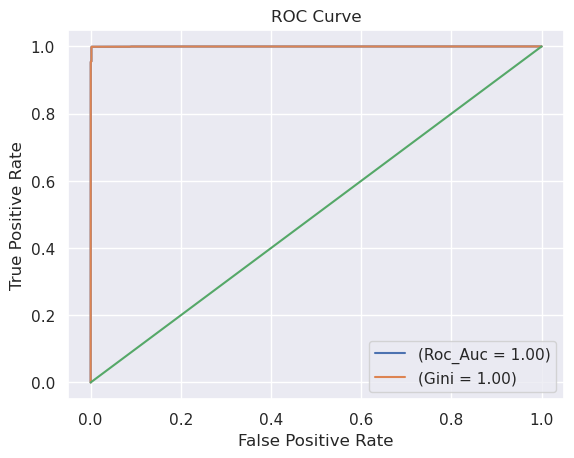

In [93]:
y_prob = optimized_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()